# Uncertainties and Distributions

The [astropy.uncertainty](http://docs.astropy.org/en/stable/uncertainty/index.html) sub-package is a relatively new sub-package which provides a framework for doing uncertainty propagation in calculations. For now, this is focused on the more accurate but slower method of tracking uncertainties by Monte-Carlo sampling. Since it is a relatively new sub-package, it is possible that it will evolve a little over time.


<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Create distributions</li>
<li>Plot distributions</li>
<li>Extract useful statistics</li>
<li>Combine distributions</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.uncertainty. For more information about the features presented below as well as other available features, you can read the
[astropy.uncertainty documentation](https://docs.astropy.org/en/stable/uncertainty/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Creating distributions

The central object in astropy.uncertainty is the [Distribution](http://docs.astropy.org/en/stable/api/astropy.uncertainty.Distribution.html#astropy.uncertainty.Distribution) class, which can be thought of as a quantity with an underlying distribution of values. Several helper functions are provided to create standard distributions:

In [2]:
from astropy import units as u
from astropy import uncertainty as unc

In [3]:
distance = unc.normal(4*u.kpc,std=0.5*u.kpc,n_samples=10000)
distance

<QuantityDistribution [3.80579143, 4.81139396, 3.97654988, ..., 3.83699791, 4.29945552,
           4.64031266] kpc with n_samples=10000>

In [4]:
velocity = unc.uniform(center=5*u.km/u.s,width=2*u.km/u.s,n_samples=10000)

You can also create arbitrary distributions - see the [documentation](http://docs.astropy.org/en/stable/uncertainty/index.html#creating-distributions) for more details.

The easiest way to visualize these distributions is to use the ``.distribution`` attribute of the ``Distribution`` objects, which returns the individual Monte-Carlo samples:

In [5]:
from astropy.visualization import quantity_support, hist
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x194f5e648e0>

(array([  2.,   1.,   2.,   2.,   1.,   6.,   3.,   4.,   7.,   9.,  18.,
         36.,  37.,  49.,  75.,  84.,  91., 123., 164., 197., 206., 263.,
        314., 323., 351., 446., 459., 481., 517., 484., 509., 499., 462.,
        455., 466., 397., 380., 321., 279., 265., 232., 203., 159., 131.,
        117.,  79.,  79.,  64.,  41.,  26.,  30.,  13.,  10.,  14.,   6.,
          2.,   2.,   2.,   2.]),
 array([2.07548593, 2.13847278, 2.20145962, 2.26444647, 2.32743331,
        2.39042016, 2.453407  , 2.51639384, 2.57938069, 2.64236753,
        2.70535438, 2.76834122, 2.83132807, 2.89431491, 2.95730176,
        3.0202886 , 3.08327545, 3.14626229, 3.20924914, 3.27223598,
        3.33522283, 3.39820967, 3.46119652, 3.52418336, 3.58717021,
        3.65015705, 3.7131439 , 3.77613074, 3.83911759, 3.90210443,
        3.96509128, 4.02807812, 4.09106497, 4.15405181, 4.21703866,
        4.2800255 , 4.34301234, 4.40599919, 4.46898603, 4.53197288,
        4.59495972, 4.65794657, 4.72093341, 4.783920

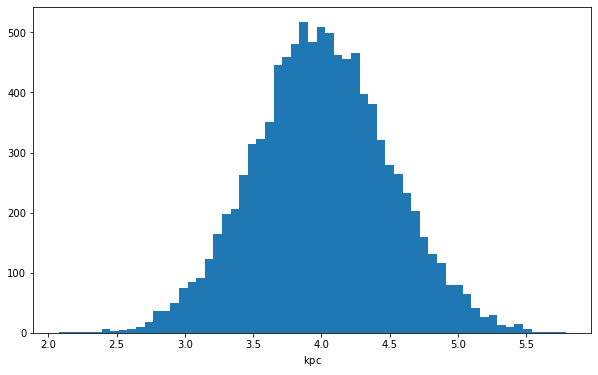

In [6]:
hist(distance.distribution,bins='knuth')

## Using distributions

Now that we have created a couple of distributions, we can use properties on these distributions to compute useful values:

In [7]:
distance.unit

Unit("kpc")

In [8]:
distance.n_samples

10000

In [9]:
distance.pdf_mean()

<Quantity 4.00198516 kpc>

In [10]:
distance.pdf_std()

<Quantity 0.50157597 kpc>

In [11]:
distance.pdf_smad()

<Quantity 0.49345265 kpc>

Distributions can be combined with quantities seamlessly:

In [12]:
velocity_fixed_time = distance/(2*u.Myr)
velocity

<QuantityDistribution [4.33743123, 5.09594981, 5.15568191, ..., 4.9257263 , 5.81981115,
           4.83215178] km / s with n_samples=10000>

(array([  2.,   1.,   2.,   2.,   1.,   6.,   3.,   4.,   7.,   9.,  18.,
         36.,  37.,  49.,  75.,  84.,  91., 123., 164., 197., 206., 263.,
        314., 323., 351., 446., 459., 481., 517., 484., 509., 499., 462.,
        455., 466., 397., 380., 321., 279., 265., 232., 203., 159., 131.,
        117.,  79.,  79.,  64.,  41.,  26.,  30.,  13.,  10.,  14.,   6.,
          2.,   2.,   2.,   2.]),
 array([1.03774297, 1.06923639, 1.10072981, 1.13222323, 1.16371666,
        1.19521008, 1.2267035 , 1.25819692, 1.28969034, 1.32118377,
        1.35267719, 1.38417061, 1.41566403, 1.44715746, 1.47865088,
        1.5101443 , 1.54163772, 1.57313115, 1.60462457, 1.63611799,
        1.66761141, 1.69910484, 1.73059826, 1.76209168, 1.7935851 ,
        1.82507853, 1.85657195, 1.88806537, 1.91955879, 1.95105222,
        1.98254564, 2.01403906, 2.04553248, 2.07702591, 2.10851933,
        2.14001275, 2.17150617, 2.20299959, 2.23449302, 2.26598644,
        2.29747986, 2.32897328, 2.36046671, 2.391960

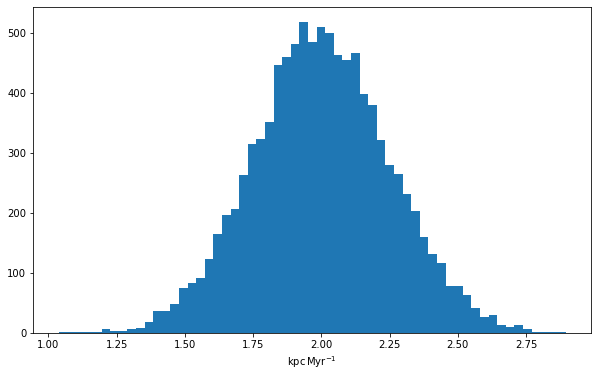

In [13]:
hist(velocity_fixed_time.distribution,bins='knuth')

and distributions can also be combined with other distributions:

In [14]:
time = distance/velocity
time

<QuantityDistribution [0.8774298 , 0.94416039, 0.77129465, ..., 0.77897099, 0.73876203,
           0.96029944] kpc s / km with n_samples=10000>

(array([  1.,   1.,   2.,   1.,   2.,   2.,   5.,  17.,  18.,  37.,  54.,
         61.,  92., 118., 184., 218., 257., 309., 367., 378., 452., 432.,
        482., 457., 425., 466., 446., 467., 446., 426., 379., 361., 352.,
        309., 293., 279., 222., 208., 178., 129., 113., 110.,  90.,  87.,
         65.,  51.,  40.,  22.,  21.,  23.,  10.,  14.,   9.,   3.,   1.,
          2.,   2.,   3.,   1.]),
 array([0.35922862, 0.37604434, 0.39286007, 0.4096758 , 0.42649153,
        0.44330726, 0.46012299, 0.47693872, 0.49375445, 0.51057018,
        0.52738591, 0.54420164, 0.56101737, 0.5778331 , 0.59464883,
        0.61146456, 0.62828029, 0.64509601, 0.66191174, 0.67872747,
        0.6955432 , 0.71235893, 0.72917466, 0.74599039, 0.76280612,
        0.77962185, 0.79643758, 0.81325331, 0.83006904, 0.84688477,
        0.8637005 , 0.88051623, 0.89733196, 0.91414768, 0.93096341,
        0.94777914, 0.96459487, 0.9814106 , 0.99822633, 1.01504206,
        1.03185779, 1.04867352, 1.06548925, 1.082304

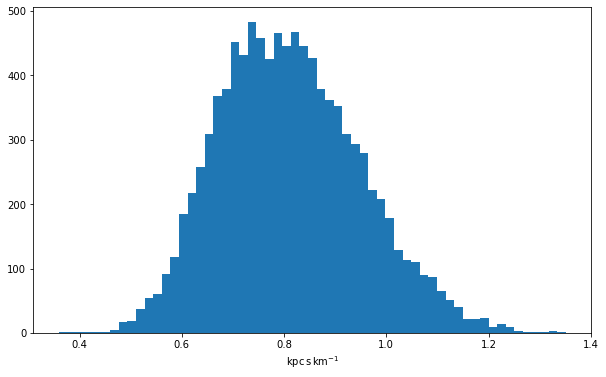

In [15]:
hist(time.distribution,bins='knuth')

Provided that the distributions have samples that match one-to-one, correlations are properly taken into account - that is, if one does:

In [16]:
import numpy as np
time = distance*np.sqrt(velocity)/velocity**1.5

(array([  1.,   1.,   2.,   1.,   2.,   2.,   5.,  17.,  18.,  37.,  54.,
         61.,  92., 118., 184., 218., 257., 309., 367., 378., 452., 432.,
        482., 457., 425., 466., 446., 467., 446., 426., 379., 361., 352.,
        309., 293., 279., 222., 208., 178., 129., 113., 110.,  90.,  87.,
         65.,  51.,  40.,  22.,  21.,  23.,  10.,  14.,   9.,   3.,   1.,
          2.,   2.,   3.,   1.]),
 array([0.35922862, 0.37604434, 0.39286007, 0.4096758 , 0.42649153,
        0.44330726, 0.46012299, 0.47693872, 0.49375445, 0.51057018,
        0.52738591, 0.54420164, 0.56101737, 0.5778331 , 0.59464883,
        0.61146456, 0.62828029, 0.64509601, 0.66191174, 0.67872747,
        0.6955432 , 0.71235893, 0.72917466, 0.74599039, 0.76280612,
        0.77962185, 0.79643758, 0.81325331, 0.83006904, 0.84688477,
        0.8637005 , 0.88051623, 0.89733196, 0.91414768, 0.93096341,
        0.94777914, 0.96459487, 0.9814106 , 0.99822633, 1.01504206,
        1.03185779, 1.04867352, 1.06548925, 1.082304

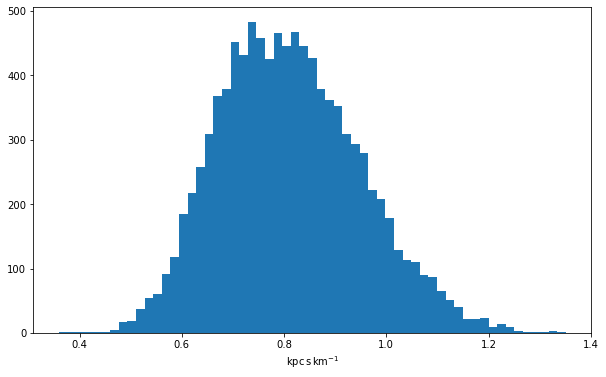

In [17]:
hist(time.distribution,bins='knuth')

Note that this is only the case if the samples match one to one (see [this section](http://docs.astropy.org/en/stable/uncertainty/index.html#covariance-in-distributions-and-discrete-sampling-effects) in the documentation for more details about this).

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)